In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
data=sns.load_dataset("iris")

In [33]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
data.shape

(150, 5)

In [35]:
data['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [36]:
data['species'].replace({'setosa':0,'versicolor':1,'virginica':2},inplace=True)

In [37]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
X=data.iloc[:,0:2].values

In [39]:
X.shape

(150, 2)

In [40]:
y=data.iloc[:,-1].values
y.shape

(150,)

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [78]:
X_train.shape

(120, 2)

In [79]:
X_test.shape

(30, 2)

In [80]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [81]:
X_train=scalar.fit_transform(X_train)

In [82]:
X_train.shape

(120, 2)

In [83]:
X_test=scalar.transform(X_test)

In [84]:
X_test.shape

(30, 2)

In [85]:
#1st method
np.sqrt(X_train.shape[0])

10.954451150103322

In [86]:
k=11

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [88]:
#train our model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [89]:
y_pred=knn.predict(X_test)

In [90]:
y_pred.shape

(30,)

In [91]:
y_test.shape

(30,)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(y_test,y_pred)

0.8

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[13,  0,  0],
       [ 0,  6,  5],
       [ 0,  1,  5]], dtype=int64)

In [119]:
#2nd method(trial and error)
accuracy=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [120]:
len(accuracy)

25

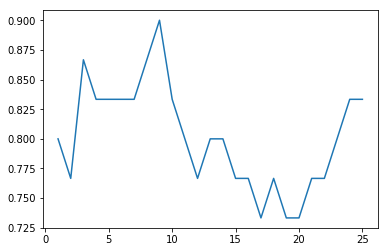

In [122]:
plt.plot(range(1,26),accuracy)

In [123]:
k=12

In [124]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [125]:
y_pred=knn.predict(X_test)

In [126]:
accuracy_score(y_test,y_pred)

0.7666666666666667

In [129]:
def predict_output():
    length=input("ENTER THE LENGTH SEPAL: ")
    width=input("ENTER THE WIDTH SEPAL: ")
    x_new=np.array([[length],[width]]).reshape(1,2)
    x_new=scalar.fit_transform(x_new)
    if(knn.predict(x_new)[0]==0):
        print("Setosa")
    if(knn.predict(x_new)[0]==1):
        print("Versicolour")
    if(knn.predict(x_new)[0]==2):
        print("Virginica")

In [130]:
predict_output()

ENTER THE LENGTH SEPAL: 7
ENTER THE WIDTH SEPAL: 5
Versicolour


C:\Users\Dell\Anaconda3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype <U1 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype <U1 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [131]:
predict_output()


ENTER THE LENGTH SEPAL: 1
ENTER THE WIDTH SEPAL: 1
Versicolour


C:\Users\Dell\Anaconda3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype <U1 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype <U1 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [133]:
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)

In [134]:
a.shape

(640,)

In [135]:
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)

In [136]:
b.shape

(763,)

In [137]:
XX,YY=np.meshgrid(a,b)

In [138]:
XX.shape

(763, 640)

In [139]:
YY.shape

(763, 640)

In [140]:
input_array=np.array([XX.ravel(),YY.ravel()]).T

In [141]:
input_array.shape

(488320, 2)

In [147]:
labels=knn.predict(input_array)

In [148]:
labels.shape

(488320,)

In [149]:
x=labels.reshape(XX.shape)

In [150]:
x.shape

(763, 640)

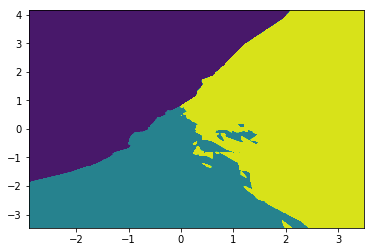

In [151]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

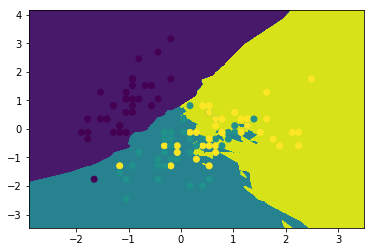

In [152]:
plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,label=y_train)